# A Beginners Guide to Creating a Top Charted Spotify Song

Analysis on Spotify track, artist, and billboards data analyzing different characteristics of tracks to create a general concensus on top charted tracks.

**1. Central Question**

What factors makes a song reach number one on the playlist and does this depend on
exterior factors like time and genre? Also are there any coorelations with how long a
top song remains on the charts and its characteristics?

**2. Setup (Imports)**

In [3]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
plots.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

**3. Data Sets**

Tracks data set is from [Kaggle](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db), originally from the Spotify API. The data has been cleaned and slightly modified for the purposes of this project. The 
individuals in the table are songs (tracks) on Spotify, and the ten features recorded about each song are:

   1. `artist_name`: Name of the artist.
   2. `track_name`: Name of the track (song).
   3. `key`: Estimated key of the track.
   4. `popularity`: Describes the popularity of the song on a scale of 0-100.
   5. `acousticness`: Describes the confidence of how acoustic the song is, on a scale of 0-1.
   6. `danceability`: Describes how suitable a song is for dancing, on a scale of 0-1.
   7. `energy`: Measures the level of intensity and activity of a song, on a scale of 0-1.
   8. `valence`: Describes the overall positiveness or happiness of the track, on a scale of 0-1.
   9. `tempo`: Measures the overall number of beats per minute (BPM) of the track.
   10. `duration_ms`: Describes how long the song is in milliseconds (thousandths of a second).
   11. `italian temp`: Name description of tempo based on Italian scale.

In [5]:
tracks = Table.read_table('spotify.csv')

In [6]:
def italian_tempo_converter(tempo):
    if tempo >= 0 and tempo < 60:
        return 'Lento'
    elif tempo >= 60 and tempo < 90:
        return 'Adagio'
    elif tempo >= 90 and tempo < 110:
        return 'Adante'
    elif tempo >= 110 and tempo < 120:
        return 'Moderato'
    elif tempo >= 120 and tempo < 160:
        return 'Allegro'
    elif tempo >=160 and tempo < 180:
        return 'Vivace'
    else:
        return 'Presto'
tracks = tracks.with_columns('duration_min', tracks.column('duration_ms')/60000,'tempo_name', tracks.apply(italian_tempo_converter
,'tempo')).drop('duration_ms')

In [7]:
tracks

artist_name,track_name,key,popularity,acousticness,danceability,energy,valence,tempo,duration_min,tempo_name
Henri Salvador,C'est beau de faire un Show,C#,0,0.611,0.389,0.91,0.814,166.969,1.65622,Vivace
Martin & les fées,Perdu d'avance (par Gad Elmaleh),F#,1,0.246,0.59,0.737,0.816,174.003,2.28955,Vivace
Joseph Williams,Don't Let Me Be Lonely Tonight,C,3,0.952,0.663,0.131,0.368,99.488,2.83778,Adante
Henri Salvador,Dis-moi Monsieur Gordon Cooper,C#,0,0.703,0.24,0.326,0.227,171.758,2.54045,Vivace
Fabien Nataf,Ouverture,F,4,0.95,0.331,0.225,0.39,140.576,1.37708,Allegro
Henri Salvador,Le petit souper aux chandelles,C#,0,0.749,0.578,0.0948,0.358,87.479,2.67712,Adagio
Martin & les fées,"Premières recherches (par Paul Ventimila, Lorie Pester, ...",C#,2,0.344,0.703,0.27,0.533,82.873,3.53822,Adagio
Laura Mayne,Let Me Let Go,F#,15,0.939,0.416,0.269,0.274,96.827,4.00112,Adante
Chorus,Helka,C,0,0.00104,0.734,0.481,0.765,125.08,3.77,Allegro
Le Club des Juniors,Les bisous des bisounours,G,10,0.319,0.598,0.705,0.718,137.496,2.5449,Allegro


Billboard Data set, also from Kaggle, contains songs that were on the Billboard Hot 100 charts from 2015 to 2019. The Billboard Hot 100 is a weekly list of the top 100 current songs, ranked based on a combination of sales, radio time, and streaming activity. Each week, each song on the Billboard Hot 100 is ranked from 1 to 100, and the popularity of hit songs can be seen by keeping track of features such as how many weeks the song appeared in the Billboard Hot 100, and the best ranking it achieved in that time.

In [8]:
billboard = Table.read_table('billboard.csv')
billboard

Song,Artist,Weeks On Chart,Peak Rank
Blank Space,Taylor Swift,36,1
Take Me To Church,Hozier,41,2
Uptown Funk!,Mark Ronson Featuring Bruno Mars,56,1
Thinking Out Loud,Ed Sheeran,58,2
Lips Are Movin,Meghan Trainor,29,4
I'm Not The Only One,Sam Smith,37,5
Love Me Harder,Ariana Grande & The Weeknd,22,7
Jealous,Nick Jonas,32,7
Animals,Maroon 5,33,8
All About That Bass,Meghan Trainor,47,5


The Artists data set contains data on musical artists from last.fm, which is a service that allows listeners to keep a record of what songs they listen to across various platforms, so that they can get personalized music recommendations.

In [9]:
artists = Table.read_table('artists.csv')
artists

artist,country,artist_tags,artist_listeners,artist_plays
Coldplay,United Kingdom,rock; alternative; britpop; alternative rock; indie; bri ...,5.38157e+06,3.60112e+08
Radiohead,United Kingdom,alternative; alternative rock; rock; indie; electronic; ...,4.73253e+06,4.99549e+08
Red Hot Chili Peppers,United States,rock; alternative rock; alternative; Funk Rock; funk; se ...,4.62084e+06,2.93784e+08
Rihanna,Barbados; United States,pop; rnb; female vocalists; dance; Hip-Hop; Rihanna; r&b ...,4.55819e+06,1.99249e+08
Eminem,United States,rap; Hip-Hop; Eminem; hip hop; pop; american; detroit; s ...,4.518e+06,1.99508e+08
Kanye West,United States,Hip-Hop; rap; hip hop; rnb; Kanye West; seen live; Gay F ...,4.3905e+06,2.38604e+08
Nirvana,United States,Grunge; rock; alternative; alternative rock; 90s; punk; ...,4.27289e+06,2.22304e+08
Muse,United Kingdom,alternative rock; rock; alternative; Progressive rock; s ...,4.08961e+06,3.44839e+08
Queen,United Kingdom,classic rock; rock; 80s; hard rock; glam rock; british; ...,4.02338e+06,1.91712e+08
Foo Fighters,United States,rock; alternative rock; Grunge; alternative; seen live; ...,4.00524e+06,1.94254e+08


    To create Top Hits table of songs that were on the charts for at least 10 weeks, and made it into the top 10 
    songs at some point in time:

In [10]:
joined_by_song = tracks.join("track_name", billboard, "Song")

In [11]:
def formatter(string1, string2):
    return string1 + "; " + string2

In [12]:
tracks = tracks.with_column("Song; Artist", tracks.apply(formatter,["track_name", "artist_name"]))
billboard = billboard.with_column("Song; Artist", billboard.apply(formatter,["Song", "Artist"]))

In [13]:
joined_by_song_artist = tracks.join("Song; Artist",billboard)
top_hits = joined_by_song_artist.where("Weeks On Chart", are.above_or_equal_to(10)).where("Peak Rank", are.below_or_equal_to(10))

In [14]:
top_hits

Song; Artist,artist_name,track_name,key,popularity,acousticness,danceability,energy,valence,tempo,duration_min,tempo_name,Song,Artist,Weeks On Chart,Peak Rank
...Ready For It?; Taylor Swift,Taylor Swift,...Ready For It?,D,73,0.0527,0.613,0.764,0.417,160.015,3.46978,Vivace,...Ready For It?,Taylor Swift,20,4
24K Magic; Bruno Mars,Bruno Mars,24K Magic,C#,80,0.034,0.818,0.803,0.632,106.97,3.76638,Adante,24K Magic,Bruno Mars,41,4
7 Years; Lukas Graham,Lukas Graham,7 Years,A#,80,0.287,0.765,0.473,0.34,119.992,3.955,Moderato,7 Years,Lukas Graham,36,2
All About That Bass; Meghan Trainor,Meghan Trainor,All About That Bass,A,68,0.0476,0.811,0.879,0.962,134.064,3.1459,Allegro,All About That Bass,Meghan Trainor,47,5
All I Want For Christmas Is You; Mariah Carey,Mariah Carey,All I Want For Christmas Is You,A,46,0.0819,0.524,0.886,0.506,150.039,4.03912,Allegro,All I Want For Christmas Is You,Mariah Carey,30,3
Animals; Maroon 5,Maroon 5,Animals,E,74,0.000185,0.279,0.742,0.328,189.868,3.85022,Presto,Animals,Maroon 5,33,8
Attention; The Weeknd,The Weeknd,Attention,E,67,0.682,0.671,0.428,0.36,148.041,3.29422,Allegro,Attention,The Weeknd,40,5
Bad At Love; Halsey,Halsey,Bad At Love,C,81,0.0604,0.675,0.751,0.612,118.384,3.02132,Moderato,Bad At Love,Halsey,33,5
Believer; Imagine Dragons,Imagine Dragons,Believer,A#,89,0.0622,0.776,0.78,0.666,124.949,3.40578,Allegro,Believer,Imagine Dragons,52,4
Better Now; Post Malone,Post Malone,Better Now,A#,93,0.354,0.68,0.563,0.374,145.028,3.85445,Allegro,Better Now,Post Malone,39,3


To shifted all the tables into dataframe in order to access a more versatile range of data tools available online:

In [15]:
billboard_df = billboard.to_df()
tracks_df = tracks.to_df()
artists_df = artists.to_df()
top_hits_df = top_hits.to_df()

**4. Visuals and Analysis of certain variables**

To get a better understanding of coorelations between certain variables, heat maps for the individual tables are presented:

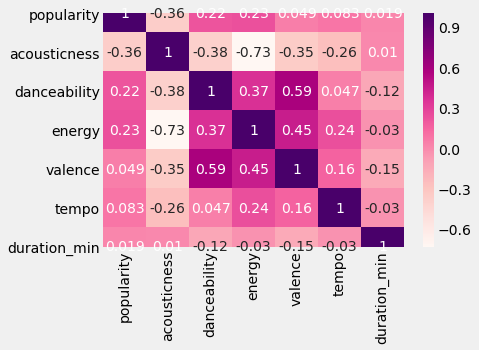

In [16]:
heatplot_tracks = sns.heatmap(tracks_df.corr(), annot=True, cmap = 'RdPu')

There are some interesting insights to point out in this plot. Specifically, there are associations between valence (the happiness of a track) and the energy or a track. Therefore, although there is not neccessarily causality between the two variables, a track that is happier is predicted to have more energy. Moreover, there is also a strong association between dancebality and valence seen, which indicates that within the dataset songs that are happier usually tend to be more danceable. These assocations are not too large, however, as both values are only around 0.6 so predictions are made with extreme caution. One association that is high, but negatively coorelated, is the relation between energy and acoustiness (how strong the acoustic is in the song). That means in the data set the more energy there is in the song tends to predict a lower acoustiness rating and vice versa.

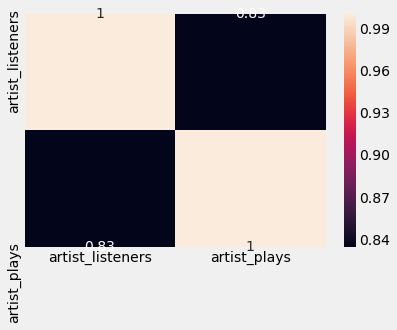

In [17]:
heatplot_artists = sns.heatmap(artists_df.corr(), annot = True)

The association between the amount of listeners a song has, and the amount of plays it has is highly coorelated. This is intitutive as more people means that they have to listen at least once. Causation cannot be drawn, however, unless an experiement is conducted which is not worth the time investment.

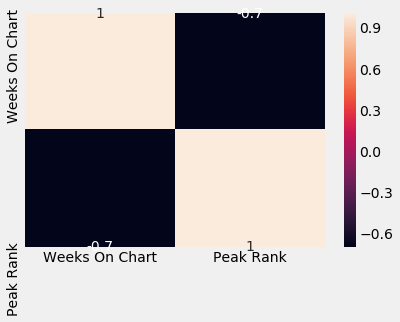

In [18]:
heatplot_billboard = sns.heatmap(billboard_df.corr(), annot = True)

This heatmap accentuates a coorelation between how long someone is on the charts and what their peak rank was. In essence, this data point demonstrates that peak rank sometimes predicts how long a song is on the charts and could be a point of further analysis.

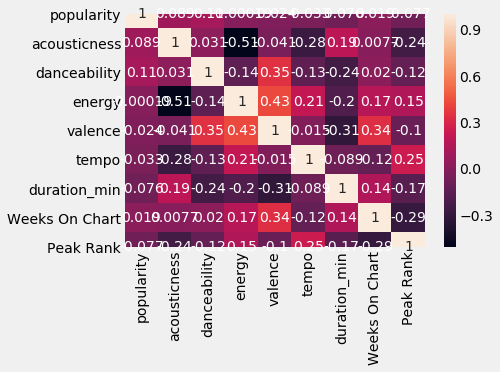

In [19]:
heatplot_top_hits = sns.heatmap(top_hits_df.corr(), annot = True)

Creating a heatmap from a joined table that includes the peak rank does not uncover any new findings, but does open up consideration of what characteristics help create a song the top song.

**5. Comparing the means of numeric traits that range from 0-1 between Data Sets**

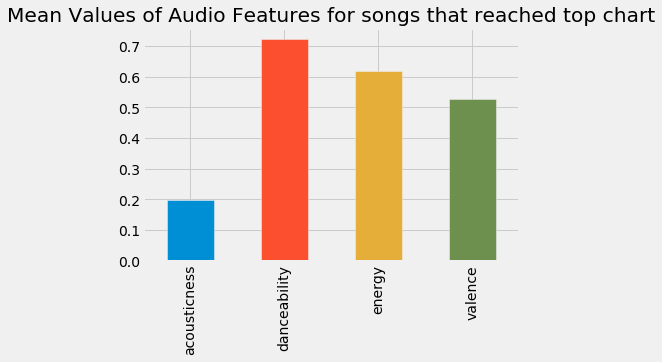

In [20]:
a = top_hits.where('Peak Rank', are.below(2))
traits = a.drop('artist_name', 'track_name', 'Song; Artist', 'Song', 'Artist','tempo_name', 'duration_min','key','popularity', 'Weeks On Chart', 'tempo','Peak Rank')
traits_df = traits.to_df()
traits_df.mean().plot.bar()
plt.title('Mean Values of Audio Features for songs that reached top chart')
plt.show()

This bar chart indicates that dancebality is a common characteristic among songs that reach the top chart (avg rating of around (0.76) while energy and valence are both relatively high at 0.6 and 0.5. In order to draw a true comparison, however, similar graphs for all the songs in the data set need to be shown.

**6. Bar Graph of means for all songs in top_list data set**

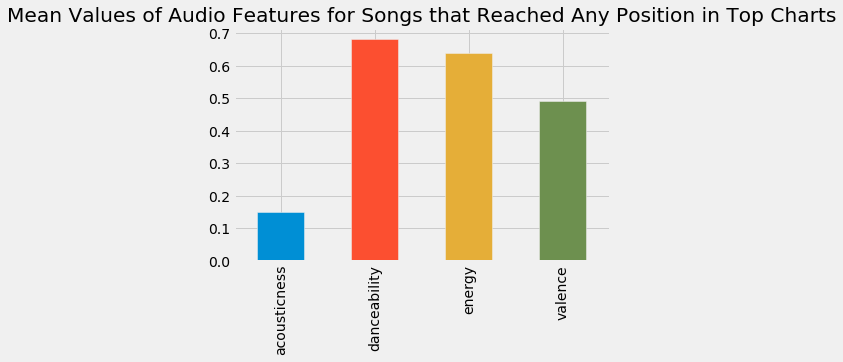

In [21]:
dropped = top_hits.drop('artist_name', 'track_name', 'Song; Artist', 'Song','Artist', 'tempo_name', 'duration_min','key','popularity', 'Weeks On Chart','tempo', 'Peak Rank')
dropped_df = dropped.to_df()
dropped_df.mean().plot.bar()
plt.title('Mean Values of Audio Features for Songs that Reached Any Position in Top Charts')
plt.show()

Interestingly, there are only small differences between songs that were generally in billboard versus songs that were able to reach the top rank. In order to recieve a true measurement of how these stats compare to any other songs, data would need to inserted with the same data columns that are songs that did not get famous so we will use the tracks data set from the start of the project.

**7. Bar Graph of many different songs, even if they haven’t reached top charts**

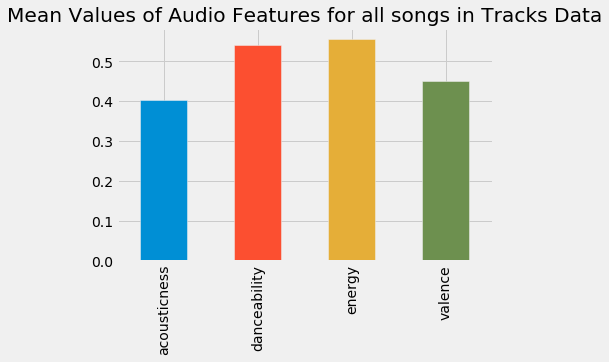

In [22]:
numeric_tracks = tracks.drop('artist_name', 'track_name', 'key', 'popularity','tempo', 'duration_min', 'tempo_name', 'Song; Artist')
numeric_tracks_df = numeric_tracks.to_df()
numeric_tracks_df.mean().plot.bar()
plt.title('Mean Values of Audio Features for all songs in Tracks Data')
plt.show()

For better visualization, inserted the bar chart for peak songs below:

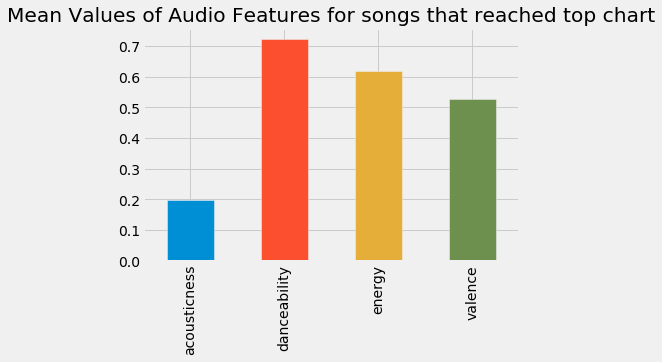

In [23]:
traits_df.mean().plot.bar()
plt.title('Mean Values of Audio Features for songs that reached top chart')
plt.show()

When comparing the two bar charts there are significant differences in the acoustiness and danceability means. This means that more popular songs tend to be be easier to dance to which makes sense since that allows for people to play this songs at big events (parties, clubs, etc.) which inflate the amount of times they are played, therefore helping them get to the top of the chart. As mentioned previously from the heatmap derived earlier, acoustiness and energy/danceability are negatively coorelated (when one increases the other is predicted to decrease). One suprising takeaway from this comparison, however, was that energy actually is higher in the average song while it is lower in songs that reach the number one rating.

**8. Further Analysis**

The analysis of the numberical describers (which were proportions that could be compared) led to some interesting findings as mentioend above. However even with these findings, it is tough to truly find a true formula in creating a song that will reach the top of the charts. It is important to note that no analysis done in this project will lead to conclusive results as we cannot prove causation without a formal experiment, but predictions can be made of which factors are most likely to create a famous song.

**9. Analysis of Keys**

Keys for songs that reached the rank of number 1:

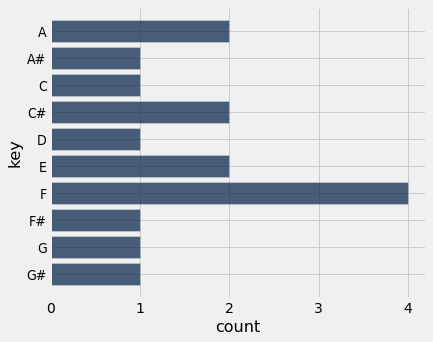

In [24]:
a_keys_grouped = a.group('key')
a_keys_grouped.barh('key')

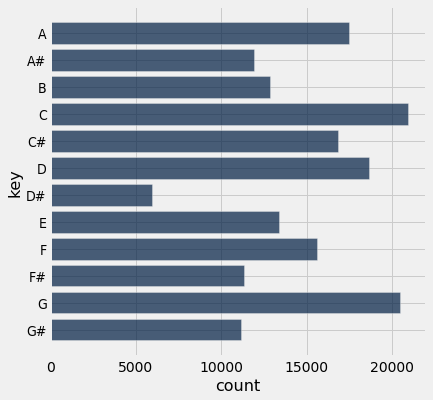

In [25]:
tracks_key_grouped = tracks.group('key')
tracks_key_grouped.barh('key')

There seems to be a much higher proportion of F keys in the top charts than in the average track. It is tough to conclusively conclude that F tracks tend to be more popular as the data set for top tracks is extremely small. However, predicts can be made that most songs within the year the data has come from (2017) favor the F key over other keys. While looking at many tracks of all sorts of popularity, there is a relatively even distribution where the F key is not even within the top 3 of most common keys in tracks. Therefore, it is a signifigant finding that F key tracks tend to be more popular in recent years.

**10. Analysis by Artist**

Artists for all rankings in top chart:

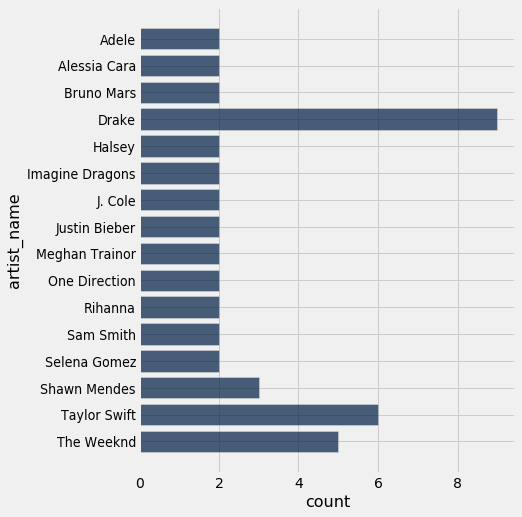

In [26]:
artist_grouped = top_hits.group('artist_name')
good_artists = artist_grouped.where('count', are.above(1))
good_artists.barh('artist_name')

Artists for songs that reached one:

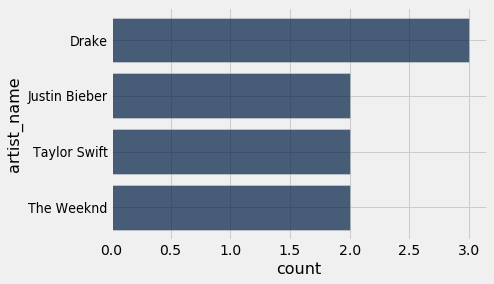

In [27]:
artist_grouped = a.group('artist_name')
good_artists = artist_grouped.where('count', are.above(1))
good_artists.barh('artist_name')

Another way to get a song to number one is just to be Drake! In seriousness, the findings indicate big name artists tend to dominate the top charts, so it may be harder for lesser known artists to immediately reach the top charts.

# Overall Findings & Conclusions

There are a few different factors that are common between all songs that reached number one.
They include high danceability, energy, and low acoustiesness ratings. Moreover, songs written in
the F key also tended to do better at reaching the top track. Lastly, songs that were written by
Drake or Taylor swift also seemed to fare better than others. It is important to note, that even
though all of these factors contribute to creating a good song, there is no causation between any
of these in creating a good song. At the very least, may this serve as a guide for future artists in
crafting a track that will reach the top of the charts! All one has to do is make a high enery song
that people love dancing to while also being written by Drake. A very easy task for any artist!